<a href="https://colab.research.google.com/github/JoyKaihatu/DeepLearningFinals/blob/main/TRAIN_DATASET_MIX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install visualkeras

In [ ]:
# import visualkeras
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import time

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/UAS_DL/CROP_AFTER_SPLIT_MIX'
path2 = '/content/drive/MyDrive/UAS_DL/MODEL_CROP_AFTER_SPLIT_MIX'

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(path+'/train',
                                          target_size=(224,224),
                                          batch_size= 32,
                                          class_mode='categorical')
validation_dataset = validation.flow_from_directory(path+'/val',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical')

Found 4638 images belonging to 30 classes.
Found 558 images belonging to 30 classes.


In [ ]:
train_dataset.filenames

['Alpinia Galanga/AG-S-001.jpg',
 'Alpinia Galanga/AG-S-002.jpg',
 'Alpinia Galanga/AG-S-003.jpg',
 'Alpinia Galanga/AG-S-004.jpg',
 'Alpinia Galanga/AG-S-005.jpg',
 'Alpinia Galanga/AG-S-006.jpg',
 'Alpinia Galanga/AG-S-007.jpg',
 'Alpinia Galanga/AG-S-008.jpg',
 'Alpinia Galanga/AG-S-009.jpg',
 'Alpinia Galanga/AG-S-010.jpg',
 'Alpinia Galanga/AG-S-012.jpg',
 'Alpinia Galanga/AG-S-013.jpg',
 'Alpinia Galanga/AG-S-014.jpg',
 'Alpinia Galanga/AG-S-015.jpg',
 'Alpinia Galanga/AG-S-016.jpg',
 'Alpinia Galanga/AG-S-017.jpg',
 'Alpinia Galanga/AG-S-018.jpg',
 'Alpinia Galanga/AG-S-019.jpg',
 'Alpinia Galanga/AG-S-020.jpg',
 'Alpinia Galanga/AG-S-021.jpg',
 'Alpinia Galanga/AG-S-023.jpg',
 'Alpinia Galanga/AG-S-026.jpg',
 'Alpinia Galanga/AG-S-027.jpg',
 'Alpinia Galanga/AG-S-028.jpg',
 'Alpinia Galanga/AG-S-029.jpg',
 'Alpinia Galanga/AG-S-030.jpg',
 'Alpinia Galanga/AG-S-031.jpg',
 'Alpinia Galanga/AG-S-032.jpg',
 'Alpinia Galanga/AG-S-033.jpg',
 'Alpinia Galanga/AG-S-034.jpg',
 'Alpinia 

In [ ]:
validation_dataset.class_indices

{'Alpinia Galanga': 0,
 'Amaranthus Viridis': 1,
 'Artocarpus Heterophyllus': 2,
 'Azadirachta Indica': 3,
 'Basella Alba': 4,
 'Brassica Juncea': 5,
 'Carissa Carandas': 6,
 'Citrus Limon': 7,
 'Ficus Auriculata': 8,
 'Ficus Religiosa': 9,
 'Hibiscus Rosa': 10,
 'Jasminum': 11,
 'Mangifera Indica': 12,
 'Mentha Piperita': 13,
 'Moringa Oleifera': 14,
 'Muntingia Calabura': 15,
 'Murraya Koenigii': 16,
 'Nerium Oleander': 17,
 'Nyctanthes Arbor Tristis': 18,
 'Ocimum Tenuiflorum': 19,
 'Piper Betle': 20,
 'Plectranthus Amboinicus': 21,
 'Pongamia Pinnata': 22,
 'Psidium Guajava': 23,
 'Punica Granatum': 24,
 'Santalum Album': 25,
 'Syzygium Cumini': 26,
 'Syzygium Jambos': 27,
 'Tabernaemontana Divaricata': 28,
 'Trigonella Foenum Graecum': 29}

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']


    accuracy = history.history['accuracy']


    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")

    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")

    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
class DurationCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = tf.timestamp()

    def on_epoch_end(self, epoch, logs=None):
        end_time = tf.timestamp()
        duration = end_time - self.start_time
        logs['duration'] = duration.numpy()
duration_callback = DurationCallback()

In [ ]:
def find_the_value(arr):
    a =  train_dataset.class_indices

    arr = arr.flatten()
    maxs_index = np.argmax(arr)



    for x,y in a.items():
        if y == maxs_index:
            return x

# Model Deep Learn

## VGG16

In [ ]:

model_VGG16=tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)
model_VGG16.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))
x = model_VGG16(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use global pooling to handle any size
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_VGG16 = tf.keras.models.Model(inputs = input, outputs = x, name = "VGG16")

model_VGG16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_8  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 30)                15390     
                                                             

## Resnet50V2

In [ ]:

model_RESNET50V2 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)
model_RESNET50V2.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_RESNET50V2(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use global pooling to handle any size
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_RESNET50V2 = tf.keras.models.Model(inputs = input, outputs = x, name = "ResNet50V2")

model_RESNET50V2.summary()

Model: "ResNet50V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling2d_9  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dense_19 (Dense)            (None, 30)                1

## DenseNet201

In [ ]:

model_DenseNet201 = tf.keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_DenseNet201.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_DenseNet201(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_DenseNet201 = tf.keras.models.Model(inputs = input, outputs = x, name = "DenseNet201")

model_DenseNet201.summary()

Model: "DenseNet201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, None, None, 1920   18321984  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 1920)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_10 (Flatten)        (None, 1920)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               983552    
                                                                 
 dense_21 (Dense)            (None, 30)                

## VGG19

In [ ]:


model_VGG19 = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_VGG19.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_VGG19(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_VGG19 = tf.keras.models.Model(inputs = input, outputs = x, name = "VGG19")

model_VGG19.summary()


Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 30)                15390     
                                                             

## Inception V3

In [ ]:

model_InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_InceptionV3.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_InceptionV3(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_InceptionV3 = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionV3")

model_InceptionV3.summary()

Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 2 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1049088   
                                                                 
 dense_25 (Dense)            (None, 30)                

## Xception

In [ ]:

model_Xception = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_Xception.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_Xception(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_Xception = tf.keras.models.Model(inputs = input, outputs = x, name = "Xception")

model_Xception.summary()

Model: "Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 30)                153

## InceptionResNetV2

In [ ]:

model_InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_InceptionResNetV2.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_InceptionResNetV2(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_InceptionResNetV2 = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionResNetV2")

model_InceptionResNetV2.summary()

Model: "InceptionResNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_14 (Flatten)        (None, 1536)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               786944    
                                                                 
 dense_29 (Dense)            (None, 30)          

## MobileNetV3 Large

In [ ]:

model_MobileNetV3Large = tf.keras.applications.MobileNetV3Large(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_MobileNetV3Large.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_MobileNetV3Large(input, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_MobileNetV3Large = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionResNetV2")

model_MobileNetV3Large.summary()

Model: "InceptionResNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3large (Function  (None, None, None, 960)   2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 960)               0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_15 (Flatten)        (None, 960)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               492032    
                                                                 
 dense_31 (Dense)            (None, 30)          

# Compile Model

In [ ]:
optimizer = 'adam'
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
model_VGG16.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_RESNET50V2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_DenseNet201.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_VGG19.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_InceptionV3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_Xception.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_InceptionResNetV2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_MobileNetV3Large.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Fit Model

In [ ]:
EPOCH = 100
BATCH_SIZE = 32

In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

CALLBACK = [duration_callback, callback2]

Epoch 1/100
145/145 [==============================] - 203s 743ms/step - loss: 1.7045 - accuracy: 0.5138 - val_loss: 1.4642 - val_accuracy: 0.5860 - duration: 202.9853
Epoch 2/100
145/145 [==============================] - 93s 641ms/step - loss: 0.7731 - accuracy: 0.7682 - val_loss: 1.5859 - val_accuracy: 0.5771 - duration: 93.2247
Epoch 3/100
145/145 [==============================] - 92s 634ms/step - loss: 0.4882 - accuracy: 0.8519 - val_loss: 1.3124 - val_accuracy: 0.6505 - duration: 92.1120
Epoch 4/100
145/145 [==============================] - 95s 654ms/step - loss: 0.3616 - accuracy: 0.8924 - val_loss: 1.1985 - val_accuracy: 0.6792 - duration: 95.1438
Epoch 5/100
145/145 [==============================] - 93s 640ms/step - loss: 0.2183 - accuracy: 0.9314 - val_loss: 1.4058 - val_accuracy: 0.6667 - duration: 93.4891
Epoch 6/100
145/145 [==============================] - 93s 639ms/step - loss: 0.2011 - accuracy: 0.9381 - val_loss: 1.1906 - val_accuracy: 0.6989 - duration: 93.2331
Ep

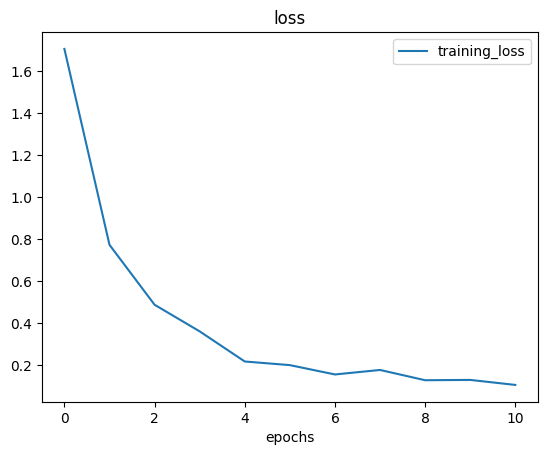

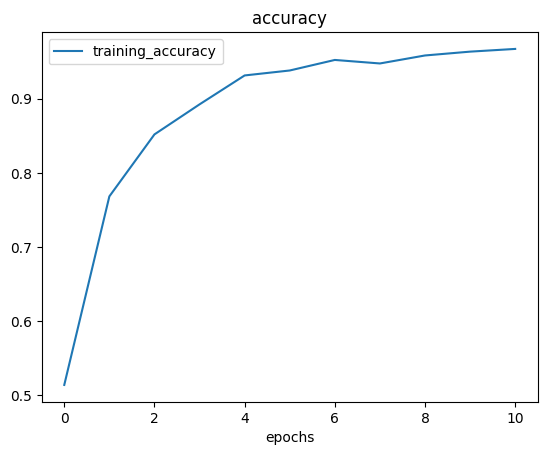

In [ ]:
model_InceptionResNetV2_Histo = model_InceptionResNetV2.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_InceptionResNetV2.save(path2+'/model_InceptionResNetV2.keras')
plot_loss_curves(model_InceptionResNetV2_Histo)

## VGG16

Epoch 1/100
  6/145 [>.............................] - ETA: 1:12 - loss: 3.9163 - accuracy: 0.0104

145/145 [==============================] - 111s 600ms/step - loss: 3.4279 - accuracy: 0.0384 - val_loss: 3.3956 - val_accuracy: 0.0466 - duration: 111.3037
Epoch 2/100
145/145 [==============================] - 83s 571ms/step - loss: 3.3966 - accuracy: 0.0466 - val_loss: 3.3921 - val_accuracy: 0.0466 - duration: 83.0243
Epoch 3/100
145/145 [==============================] - 83s 570ms/step - loss: 3.3940 - accuracy: 0.0468 - val_loss: 3.3913 - val_accuracy: 0.0466 - duration: 82.7164
Epoch 4/100
145/145 [==============================] - 83s 572ms/step - loss: 3.3939 - accuracy: 0.0461 - val_loss: 3.3911 - val_accuracy: 0.0466 - duration: 83.1201
Epoch 5/100
145/145 [==============================] - 81s 557ms/step - loss: 3.3936 - accuracy: 0.0468 - val_loss: 3.3910 - val_accuracy: 0.0466 - duration: 81.2003
Epoch 6/100
145/145 [==============================] - 81s 555ms/step - loss: 3.3935 - accuracy: 0.0468 - val_loss: 3.3911 - val_accuracy: 0.0466 - duration: 80.7932
Epoch 7/100
14

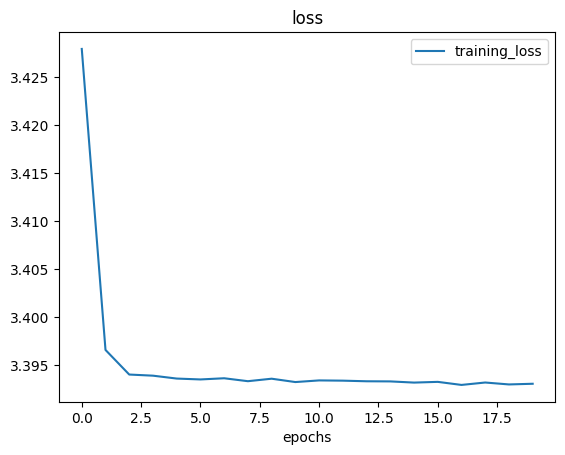

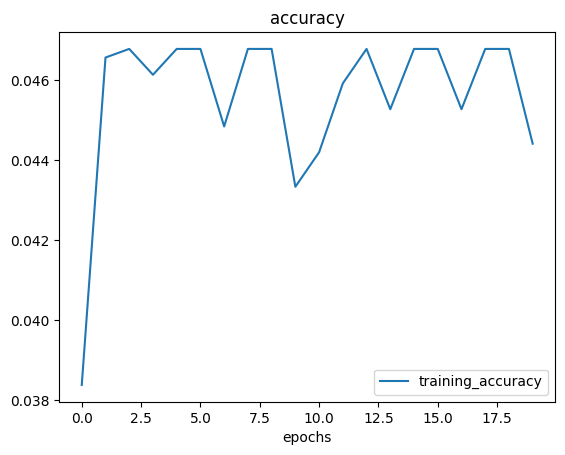

In [ ]:
model_VGG16_Histo = model_VGG16.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_VGG16.save(path2+'/model_VGG16.keras')
plot_loss_curves(model_VGG16_Histo)

Epoch 1/100
145/145 [==============================] - 125s 616ms/step - loss: 2.5346 - accuracy: 0.2792 - val_loss: 2.4764 - val_accuracy: 0.3190 - duration: 124.5911
Epoch 2/100
145/145 [==============================] - 80s 552ms/step - loss: 1.6941 - accuracy: 0.4944 - val_loss: 1.8859 - val_accuracy: 0.4391 - duration: 80.2678
Epoch 3/100
145/145 [==============================] - 79s 545ms/step - loss: 1.2068 - accuracy: 0.6367 - val_loss: 1.7330 - val_accuracy: 0.5358 - duration: 79.4656
Epoch 4/100
145/145 [==============================] - 80s 551ms/step - loss: 0.9166 - accuracy: 0.7184 - val_loss: 1.5385 - val_accuracy: 0.5556 - duration: 79.9402
Epoch 5/100
145/145 [==============================] - 79s 544ms/step - loss: 0.6999 - accuracy: 0.7840 - val_loss: 1.7283 - val_accuracy: 0.5609 - duration: 79.2763
Epoch 6/100
145/145 [==============================] - 78s 539ms/step - loss: 0.5648 - accuracy: 0.8249 - val_loss: 1.6497 - val_accuracy: 0.5771 - duration: 78.2647
Ep

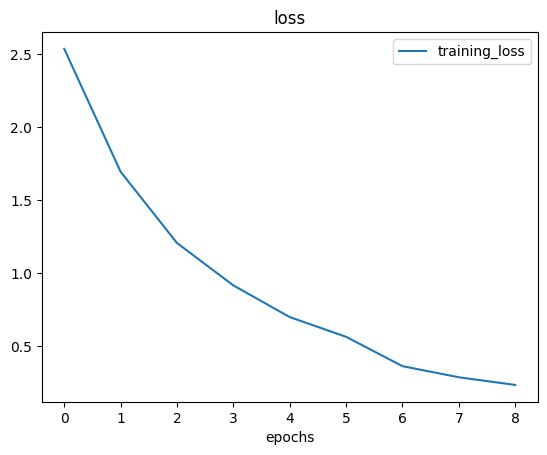

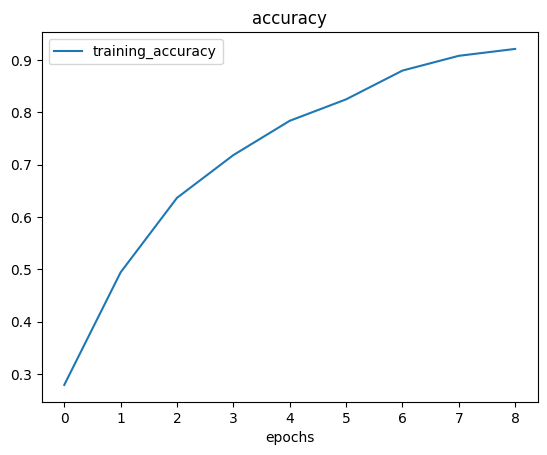

In [ ]:
model_Resnet50V2_Histo = model_RESNET50V2.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_RESNET50V2.save(path2+'/model_RESNET50V2.keras')
plot_loss_curves(model_Resnet50V2_Histo)

Epoch 1/100
145/145 [==============================] - 247s 820ms/step - loss: 1.9724 - accuracy: 0.4334 - val_loss: 1.7652 - val_accuracy: 0.4785 - duration: 247.4169
Epoch 2/100
145/145 [==============================] - 94s 647ms/step - loss: 1.1689 - accuracy: 0.6382 - val_loss: 1.5347 - val_accuracy: 0.5806 - duration: 94.0793
Epoch 3/100
145/145 [==============================] - 98s 672ms/step - loss: 0.8496 - accuracy: 0.7439 - val_loss: 1.4317 - val_accuracy: 0.6057 - duration: 97.6581
Epoch 4/100
145/145 [==============================] - 92s 632ms/step - loss: 0.6505 - accuracy: 0.7997 - val_loss: 1.3619 - val_accuracy: 0.6416 - duration: 91.9426
Epoch 5/100
145/145 [==============================] - 92s 632ms/step - loss: 0.5832 - accuracy: 0.8206 - val_loss: 1.2448 - val_accuracy: 0.6685 - duration: 92.0983
Epoch 6/100
145/145 [==============================] - 93s 638ms/step - loss: 0.4518 - accuracy: 0.8603 - val_loss: 1.2925 - val_accuracy: 0.6398 - duration: 92.7726
Ep

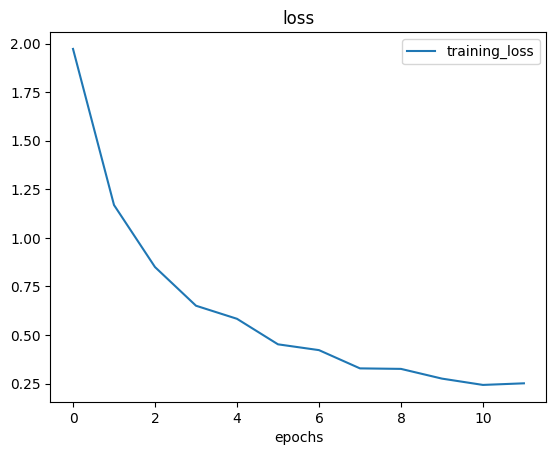

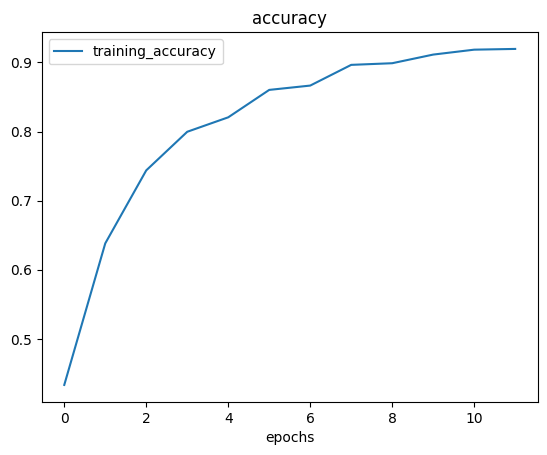

In [ ]:
model_DenseNet201_Histo = model_DenseNet201.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_DenseNet201.save(path2+'/model_DenseNet201.keras')
plot_loss_curves(model_DenseNet201_Histo)

In [ ]:
model_VGG19_Histo = model_VGG19.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_VGG19.save(path2+'/model_VGG19.keras')
plot_loss_curves(model_VGG19_Histo)

In [ ]:
model_InceptionV3_Histo = model_InceptionV3.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_InceptionV3.save(path2+'/model_InceptionV3.keras')
plot_loss_curves(model_InceptionV3_Histo)

In [ ]:
model_Xception_Histo = model_Xception.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_Xception.save(path2+'/model_Xception.keras')
plot_loss_curves(model_Xception_Histo)

In [ ]:
model_MobileNetV3Large_Histo = model_MobileNetV3Large.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_MobileNetV3Large.save(path2+'/model_MobileNetV3Large.keras')
plot_loss_curves(model_MobileNetV3Large_Histo)